# Analiza regresyjna

**Zadanie 1**

Plik `*housing_prices.csv* zawiera dane dotyczące mieszkań w dużym mieście. Każdy wiersz opisuje jedno mieszkanie.
Kolumny w pliku:
- `id` - identyfikator obserwacji
- `area_m2` - metraż mieszkania w metrach kwadratowych
- `distance_to_center_km` - odległość mieszkania od centrum miasta w kilometrach
- `floor` - piętro, na którym znajduje się mieszkanie (0 oznacza parter)
- `building_age_years` - wiek budynku w latach
- `high_standard` - standard mieszkania (0 - standard podstawowy, 1 - podwyższony)
- `price_pln` - cena mieszkania w złotych (zmienna objaśniana)

Celem zadania jest zbadanie prostych zależności liniowych pomiędzy wybranymi cechami mieszkań a ich ceną.
- Wczytanie i analiza danych
    1. Wczytaj dane z pliku *housing_prices.csv*.
    2. Wyświetl pierwsze kilka wierszy danych.
    3. Sprawdź typy danych oraz podstawowe statystyki opisowe.
    4. Upewnij się, że w danych nie występują braki wartości.
- Regresja liniowa: metraż a cena
    1. Zbuduj model regresji liniowej opisujący zależność ceny mieszkania `price_pln` od metrażu `area_m2`.
    2. Podziel dane na zbiór treningowy i testowy.
    3. Dopasuj model do zbioru treningowego i wykonaj predykcję dla zbioru testowego.
    4. Oblicz miary jakości modelu:
       - współczynnik determinacji $R^2$
       - MAE
       - MSE
       - RMSE
    5. Wykonaj wykres punktowy przedstawiający zależność `area_m2` - `price_pln` oraz nanieś na niego prostą regresji.
    6. Zinterpretuj otrzymany współczynnik regresji (nachylenie prostej).
- Regresja liniowa: odległość od centrum a cena
    1. Zbuduj model regresji liniowej opisujący zależność ceny mieszkania `price_pln` od odległości od centrum `distance_to_center_km`.
    2. Podziel dane na zbiór treningowy i testowy.
    3. Dopasuj model i wykonaj predykcję.
    4. Oblicz miary jakości modelu:
       - $R^2$
       - MAE
       - MSE
       - RMSE
    5. Wykonaj wykres punktowy oraz prostą regresji.
    6. Zinterpretuj znak i wartość współczynnika regresji.
- Porównanie modeli
    1. Porównaj oba modele regresji liniowej:
       - metraż $\to$ cena
       - odległość od centrum $\to$ cena
    2. Wskaż, który model lepiej opisuje zmienność ceny mieszkań.
    3. Odpowiedz na pytania:
       - Czy wyższa wartość $R^2$ zawsze oznacza lepszy model?
       - Jak obecność obserwacji odstających może wpływać na wyniki regresji liniowej?

# Wczytanie danych


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set_theme(style="whitegrid")



df_housing = pd.read_csv('housing_prices.csv')

print("Pierwsze 5 wierszy:")
display(df_housing.head())

print("\nInformacje o danych:")
print(df_housing.info())

print("\nStatystyki opisowe:")
display(df_housing.describe())

print("\nBraki danych:")
print(df_housing.isnull().sum())

Pierwsze 5 wierszy:


,id,area_m2,distance_to_center_km,floor,building_age_years,high_standard,price_pln
0,1,59.4,3.15,1,43,0,624403
1,2,36.0,4.24,4,57,1,618779
2,3,68.0,3.99,0,46,0,908643
3,4,80.8,15.70,0,48,0,466647
4,5,18.0,1.85,3,46,1,531117



Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     220 non-null    int64  
 1   area_m2                220 non-null    float64
 2   distance_to_center_km  220 non-null    float64
 3   floor                  220 non-null    int64  
 4   building_age_years     220 non-null    int64  
 5   high_standard          220 non-null    int64  
 6   price_pln              220 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 12.2 KB
None

Statystyki opisowe:


,id,area_m2,distance_to_center_km,floor,building_age_years,high_standard,price_pln
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,2.200000e+02
mean,110.500000,54.355909,4.559818,4.722727,34.818182,0.390909,7.204371e+05
std,63.652704,16.089113,3.128682,3.237964,17.314803,0.489067,2.425029e+05
min,1.000000,18.000000,0.300000,0.000000,0.000000,0.000000,1.400000e+05
25%,55.750000,43.350000,2.382500,2.000000,24.000000,0.000000,5.584585e+05
50%,110.500000,54.000000,3.990000,4.500000,35.500000,0.000000,6.963420e+05
75%,165.250000,64.550000,6.042500,8.000000,44.000000,1.000000,8.725215e+05
max,220.000000,106.200000,18.000000,10.000000,92.000000,1.000000,1.477501e+06



Braki danych:
id                       0
area_m2                  0
distance_to_center_km    0
floor                    0
building_age_years       0
high_standard            0
price_pln                0
dtype: int64


# Regresja liniowa m2/cena

Model: area_m2 -> price_pln
R^2: 0.6548
MAE: 134679.66
MSE: 29106564591.11
RMSE: 170606.46
Współczynnik regresji (nachylenie): 10858.04


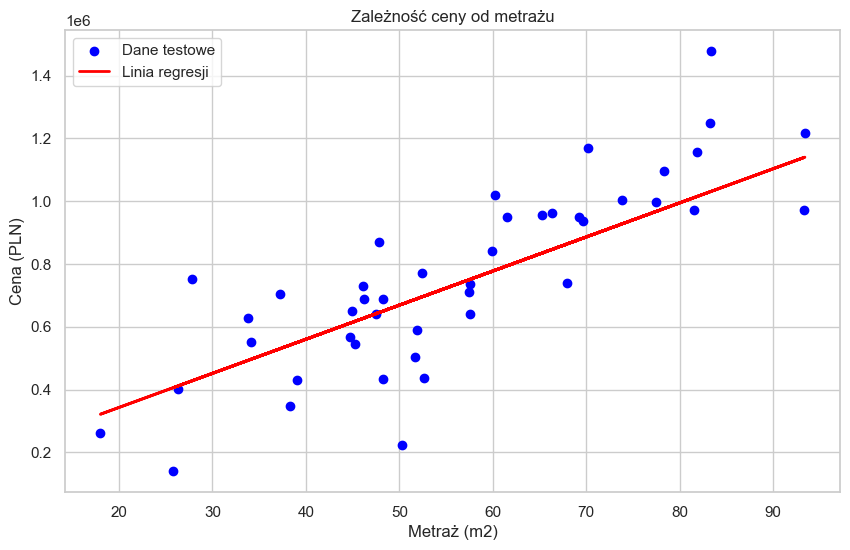

Interpretacja: Wzrost metrażu o 1 m2 powoduje średni wzrost ceny o 10858.04 PLN.


In [2]:
X_area = df_housing[['area_m2']]
y_price = df_housing['price_pln']

X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X_area, y_price, test_size=0.2, random_state=42)

model_area = LinearRegression()
model_area.fit(X_train_area, y_train_area)

y_pred_area = model_area.predict(X_test_area)

r2_area = r2_score(y_test_area, y_pred_area)
mae_area = mean_absolute_error(y_test_area, y_pred_area)
mse_area = mean_squared_error(y_test_area, y_pred_area)
rmse_area = np.sqrt(mse_area)

print("Model: area_m2 -> price_pln")
print(f"R^2: {r2_area:.4f}")
print(f"MAE: {mae_area:.2f}")
print(f"MSE: {mse_area:.2f}")
print(f"RMSE: {rmse_area:.2f}")
print(f"Współczynnik regresji (nachylenie): {model_area.coef_[0]:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_area, y_test_area, color='blue', label='Dane testowe')
plt.plot(X_test_area, y_pred_area, color='red', linewidth=2, label='Linia regresji')
plt.xlabel('Metraż (m2)')
plt.ylabel('Cena (PLN)')
plt.title('Zależność ceny od metrażu')
plt.legend()
plt.show()

print(f"Interpretacja: Wzrost metrażu o 1 m2 powoduje średni wzrost ceny o {model_area.coef_[0]:.2f} PLN.")

# regresja liniowa dist centrum/cena

Model: distance_to_center_km -> price_pln
R^2: 0.0727
MAE: 227314.83
MSE: 78183859281.60
RMSE: 279613.77
Współczynnik regresji (nachylenie): -21642.00


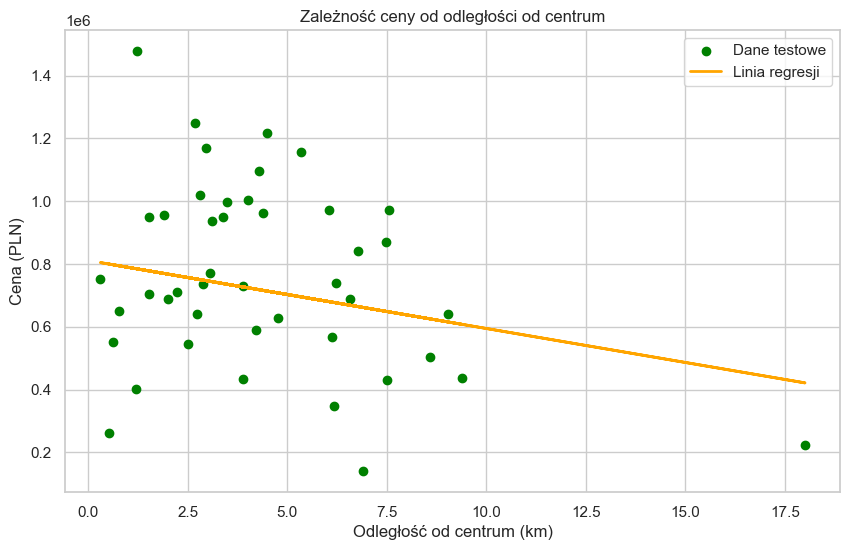

Interpretacja: Wzrost odległości od centrum o 1 km powoduje średnią zmianę ceny o -21642.00 PLN.


In [3]:
X_dist = df_housing[['distance_to_center_km']]
y_price = df_housing['price_pln']

X_train_dist, X_test_dist, y_train_dist, y_test_dist = train_test_split(X_dist, y_price, test_size=0.2, random_state=42)

model_dist = LinearRegression()
model_dist.fit(X_train_dist, y_train_dist)

y_pred_dist = model_dist.predict(X_test_dist)

r2_dist = r2_score(y_test_dist, y_pred_dist)
mae_dist = mean_absolute_error(y_test_dist, y_pred_dist)
mse_dist = mean_squared_error(y_test_dist, y_pred_dist)
rmse_dist = np.sqrt(mse_dist)

print("Model: distance_to_center_km -> price_pln")
print(f"R^2: {r2_dist:.4f}")
print(f"MAE: {mae_dist:.2f}")
print(f"MSE: {mse_dist:.2f}")
print(f"RMSE: {rmse_dist:.2f}")
print(f"Współczynnik regresji (nachylenie): {model_dist.coef_[0]:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_dist, y_test_dist, color='green', label='Dane testowe')
plt.plot(X_test_dist, y_pred_dist, color='orange', linewidth=2, label='Linia regresji')
plt.xlabel('Odległość od centrum (km)')
plt.ylabel('Cena (PLN)')
plt.title('Zależność ceny od odległości od centrum')
plt.legend()
plt.show()

print(f"Interpretacja: Wzrost odległości od centrum o 1 km powoduje średnią zmianę ceny o {model_dist.coef_[0]:.2f} PLN.")

# Porownanie 1/2

In [16]:
print("Porównanie modeli:")
print(f"Model 1 (Metraż): R^2 = {r2_area:.4f}, RMSE = {rmse_area:.2f}")
print(f"Model 2 (Odległość): R^2 = {r2_dist:.4f}, RMSE = {rmse_dist:.2f}")

if r2_area > r2_dist:
    print("\nModel oparty na metrażu lepiej opisuje zmienność ceny mieszkań.")
else:
    print("\nModel oparty na odległości od centrum lepiej opisuje zmienność ceny mieszkań.")

print("\nOdpowiedzi na pytania:")

Porównanie modeli:
Model 1 (Metraż): R^2 = 0.6548, RMSE = 170606.46
Model 2 (Odległość): R^2 = 0.0727, RMSE = 279613.77

Model oparty na metrażu lepiej opisuje zmienność ceny mieszkań.

Odpowiedzi na pytania:


**Zadanie 2**

Korzystając z danych z Zadania 1, zbuduj i porównaj modele regresji wielorakiej opisujące cenę mieszkania `price_pln`.
1. Zbuduj model regresji wielorakiej z wykorzystaniem zmiennych:
   - `area_m2`
   - `distance_to_center_km`
2. Zbuduj pełny model regresji wielorakiej, wykorzystując zmienne:
   - `area_m2`
   - `distance_to_center_km`
   - `floor`
   - `building_age_years`
   - `high_standard`
3. Dla każdego modelu:
   - podziel dane na zbiór treningowy i testowy,
   - dopasuj model i wykonaj predykcję,
   - oblicz miary jakości: $R^2$, MAE, MSE, RMSE.

4. Porównaj oba modele z modelem jednowymiarowym z Zadania 1 i wskaż, który najlepiej opisuje dane.
5. Dla pełnego modelu wypisz współczynniki regresji i krótko zinterpretuj ich znaczenie (przy stałych pozostałych zmiennych).

In [5]:
X_multi1 = df_housing[['area_m2', 'distance_to_center_km']]
y_multi1 = df_housing['price_pln']

X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_multi1, y_multi1, test_size=0.2, random_state=42)

model_multi1 = LinearRegression()
model_multi1.fit(X_train_m1, y_train_m1)
y_pred_m1 = model_multi1.predict(X_test_m1)

r2_m1 = r2_score(y_test_m1, y_pred_m1)
mae_m1 = mean_absolute_error(y_test_m1, y_pred_m1)
mse_m1 = mean_squared_error(y_test_m1, y_pred_m1)
rmse_m1 = np.sqrt(mse_m1)

print("Model 3: [area_m2, distance_to_center_km] -> price_pln")
print(f"R^2: {r2_m1:.4f}")
print(f"MAE: {mae_m1:.2f}")
print(f"MSE: {mse_m1:.2f}")
print(f"RMSE: {rmse_m1:.2f}")

features_full = ['area_m2', 'distance_to_center_km', 'floor', 'building_age_years', 'high_standard']
X_multi2 = df_housing[features_full]
y_multi2 = df_housing['price_pln']

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_multi2, y_multi2, test_size=0.2, random_state=42)

model_multi2 = LinearRegression()
model_multi2.fit(X_train_m2, y_train_m2)
y_pred_m2 = model_multi2.predict(X_test_m2)

r2_m2 = r2_score(y_test_m2, y_pred_m2)
mae_m2 = mean_absolute_error(y_test_m2, y_pred_m2)
mse_m2 = mean_squared_error(y_test_m2, y_pred_m2)
rmse_m2 = np.sqrt(mse_m2)

print("\nModel 4: Pełny model -> price_pln")
print(f"R^2: {r2_m2:.4f}")
print(f"MAE: {mae_m2:.2f}")
print(f"MSE: {mse_m2:.2f}")
print(f"RMSE: {rmse_m2:.2f}")

Model 3: [area_m2, distance_to_center_km] -> price_pln
R^2: 0.8228
MAE: 96564.65
MSE: 14943216460.85
RMSE: 122242.45

Model 4: Pełny model -> price_pln
R^2: 0.8943
MAE: 74930.95
MSE: 8911296082.93
RMSE: 94399.66


In [6]:
print("Porównanie modeli (R^2):")
print(f"Model 1 (Tylko metraż): {r2_area:.4f}")
print(f"Model 3 (Metraż + Odległość): {r2_m1:.4f}")
print(f"Model 4 (Pełny): {r2_m2:.4f}")

best_model_r2 = max(r2_area, r2_m1, r2_m2)
if best_model_r2 == r2_m2:
    print("\nNajlepszy model to Model 4 (Pełny).")
elif best_model_r2 == r2_m1:
    print("\nNajlepszy model to Model 3 (Metraż + Odległość).")
else:
    print("\nNajlepszy model to Model 1 (Tylko metraż).")

print("\nWspółczynniki regresji dla pełnego modelu:")
for feature, coef in zip(features_full, model_multi2.coef_):
    print(f"{feature}: {coef:.2f}")

print("\nInterpretacja:")
print("Współczynniki oznaczają zmianę ceny przy wzroście danej cechy o 1 jednostkę, przy założeniu, że pozostałe cechy pozostają bez zmian (ceteris paribus).")
print("Np. dodatni współczynnik przy 'high_standard' oznacza, że wyższy standard podnosi cenę, a ujemny przy 'building_age_years' (jeśli taki jest) oznacza, że starsze budynki są tańsze.")

Porównanie modeli (R^2):
Model 1 (Tylko metraż): 0.6548
Model 3 (Metraż + Odległość): 0.8228
Model 4 (Pełny): 0.8943

Najlepszy model to Model 4 (Pełny).

Współczynniki regresji dla pełnego modelu:
area_m2: 12906.87
distance_to_center_km: -35882.59
floor: 9425.22
building_age_years: -1743.52
high_standard: 122378.83

Interpretacja:
Współczynniki oznaczają zmianę ceny przy wzroście danej cechy o 1 jednostkę, przy założeniu, że pozostałe cechy pozostają bez zmian (ceteris paribus).
Np. dodatni współczynnik przy 'high_standard' oznacza, że wyższy standard podnosi cenę, a ujemny przy 'building_age_years' (jeśli taki jest) oznacza, że starsze budynki są tańsze.


**Zadanie 3**
Plik *fuel_consumption.csv* zawiera dane dotyczące zużycia paliwa samochodu w zależności od prędkości jazdy.
Każdy wiersz opisuje jeden pomiar.

Kolumny w pliku:
- `speed_kmh` - prędkość jazdy w km/h  
- `fuel_consumption_l_100km` - zużycie paliwa w litrach na 100 km (zmienna objaśniana)  
- `car_weight_kg` - masa pojazdu w kilogramach  

Załaduj dane z pliku  *fuel_consumption.csv*, przeanalizuj je, a następnie zbuduj i porównaj dwa modele regresji opisujące zależność
zużycia paliwa `fuel_consumption_l_100km` od prędkości jazdy `speed_kmh`:
- model regresji liniowej,
- model regresji wielomianowej stopnia drugiego.

Dla obu modeli:
- podziel dane na zbiór treningowy i testowy,
- dopasuj model i wykonaj predykcję,
- oblicz miary jakości: $R^2$, MAE, MSE, RMSE,
- wykonaj wykres punktowy oraz nanieś dopasowanie modeli.

Na koniec porównaj oba modele i odpowiedz krótko:
- który model lepiej opisuje dane,
- dlaczego regresja liniowa nie jest odpowiednia do opisu tej zależności,
- czym różni się regresja wielomianowa od regresji wielorakiej.

In [7]:
# Wczytanie danych
df_fuel = pd.read_csv('fuel_consumption.csv')
print("Dane fuel_consumption:")
display(df_fuel.head())

X_fuel = df_fuel[['speed_kmh']]
y_fuel = df_fuel['fuel_consumption_l_100km']

# Podział danych
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train_f, y_train_f)
y_pred_lin = lin_reg.predict(X_test_f)

r2_lin = r2_score(y_test_f, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test_f, y_pred_lin))

print(f"Regresja Liniowa: R^2 = {r2_lin:.4f}, RMSE = {rmse_lin:.2f}")

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_f)
X_test_poly = poly.transform(X_test_f)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_f)
y_pred_poly = poly_reg.predict(X_test_poly)

r2_poly = r2_score(y_test_f, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test_f, y_pred_poly))

print(f"Regresja Wielomianowa (st. 2): R^2 = {r2_poly:.4f}, RMSE = {rmse_poly:.2f}")

Dane fuel_consumption:


,id,speed_kmh,car_weight_kg,fuel_consumption_l_100km
0,1,139.4,1551,9.75
1,2,72.0,1159,6.52
2,3,121.0,1387,9.84
3,4,122.1,1407,9.33
4,5,137.3,1589,10.30


Regresja Liniowa: R^2 = 0.1516, RMSE = 1.00
Regresja Wielomianowa (st. 2): R^2 = 0.7527, RMSE = 0.54


c:\Users\kacpe\Desktop\laby\Inzynieria i analiza danych\lab8\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kacpe\Desktop\laby\Inzynieria i analiza danych\lab8\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


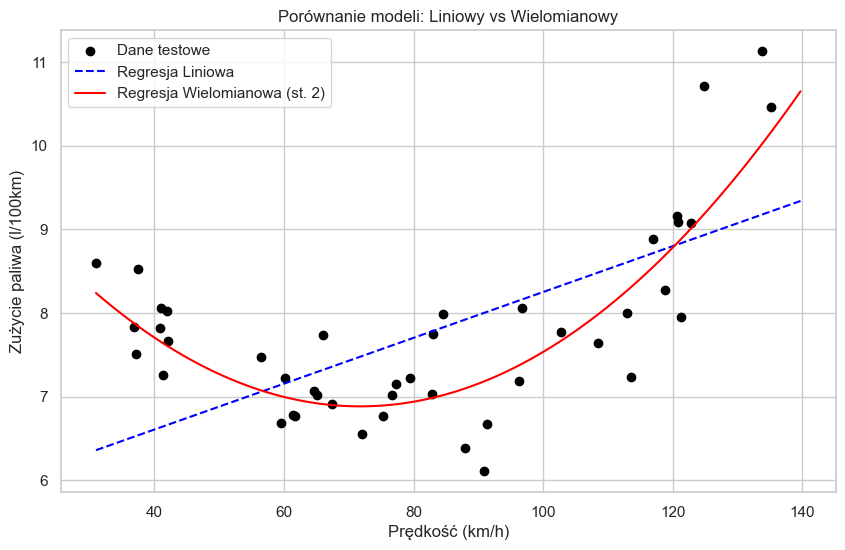

Porównanie:
Model wielomianowy lepiej opisuje dane.

Odpowiedzi:
- Dlaczego regresja liniowa nie jest odpowiednia? Zależność zużycia paliwa od prędkości jest nieliniowa (zazwyczaj w kształcie litery U), co widać na wykresie. Prosta linia nie jest w stanie oddać tego kształtu.
- Czym różni się regresja wielomianowa od regresji wielorakiej? Regresja wielomianowa to szczególny przypadek regresji liniowej, gdzie wprowadzamy nowe cechy będące potęgami oryginalnej cechy (np. x^2). Regresja wieloraka wykorzystuje wiele różnych cech (x1, x2, x3...) do predykcji.


In [8]:
# Wykres
plt.figure(figsize=(10, 6))
plt.scatter(X_test_f, y_test_f, color='black', label='Dane testowe')

X_range = np.linspace(X_fuel.min(), X_fuel.max(), 100).reshape(-1, 1)
y_lin_plot = lin_reg.predict(X_range)
y_poly_plot = poly_reg.predict(poly.transform(X_range))

plt.plot(X_range, y_lin_plot, color='blue', label='Regresja Liniowa', linestyle='--')
plt.plot(X_range, y_poly_plot, color='red', label='Regresja Wielomianowa (st. 2)')

plt.xlabel('Prędkość (km/h)')
plt.ylabel('Zużycie paliwa (l/100km)')
plt.title('Porównanie modeli: Liniowy vs Wielomianowy')
plt.legend()
plt.show()

print("Porównanie:")
if r2_poly > r2_lin:
    print("Model wielomianowy lepiej opisuje dane.")
else:
    print("Model liniowy lepiej opisuje dane.")

print("\nOdpowiedzi:")
print("- Dlaczego regresja liniowa nie jest odpowiednia? Zależność zużycia paliwa od prędkości jest nieliniowa (zazwyczaj w kształcie litery U), co widać na wykresie. Prosta linia nie jest w stanie oddać tego kształtu.")
print("- Czym różni się regresja wielomianowa od regresji wielorakiej? Regresja wielomianowa to szczególny przypadek regresji liniowej, gdzie wprowadzamy nowe cechy będące potęgami oryginalnej cechy (np. x^2). Regresja wieloraka wykorzystuje wiele różnych cech (x1, x2, x3...) do predykcji.")

**Zadanie 4**

Plik *fish.csv* zawiera dane dotyczące ryb różnych gatunków. Każdy wiersz opisuje jedną rybę wraz z jej wymiarami oraz masą.

Dostępne kolumny:
- `Species` - gatunek ryby
- `Weight` - masa ryby (zmienna objaśniana)
- `Length1`, `Length2`, `Length3` - długości ryby (różne sposoby pomiaru)
- `Height` - wysokość ryby
- `Width` - szerokość ryby

Załaduj dane z pliku *fish.csv*, przeanalizuj je, a następnie zbuduj i porównaj modele regresji opisujące masę ryby `Weight`.
1. Zbuduj model regresji liniowej, w którym masa ryby `Weight`
   opisywana jest na podstawie jednej wybranej długości
   (np. `Length1`).
2. Zbuduj model regresji wielorakiej wykorzystujący wszystkie
   dostępne wymiary ryby (`Length1`, `Length2`, `Length3`, `Height`, `Width`).
3. Porównaj oba modele pod względem jakości dopasowania
   (oblicz $R^2$, MAE, MSE, RMSE) i wskaż, który model lepiej opisuje dane.
4. Na podstawie wykresów i metryk oceń,
   czy zależność pomiędzy wymiarami ryby a jej masą
   ma charakter liniowy, czy nieliniowy.
5. Odpowiedz krótko:
   - dlaczego regresja jednowymiarowa może być niewystarczająca,
   - dlaczego regresja wieloraka lepiej opisuje to zjawisko.

Dane fish:


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Model 1 (Length1): R^2 = 0.8116, RMSE = 163.70
Model 2 (Wszystkie wymiary): R^2 = 0.8821, RMSE = 129.48
Model wieloraki lepiej opisuje dane.


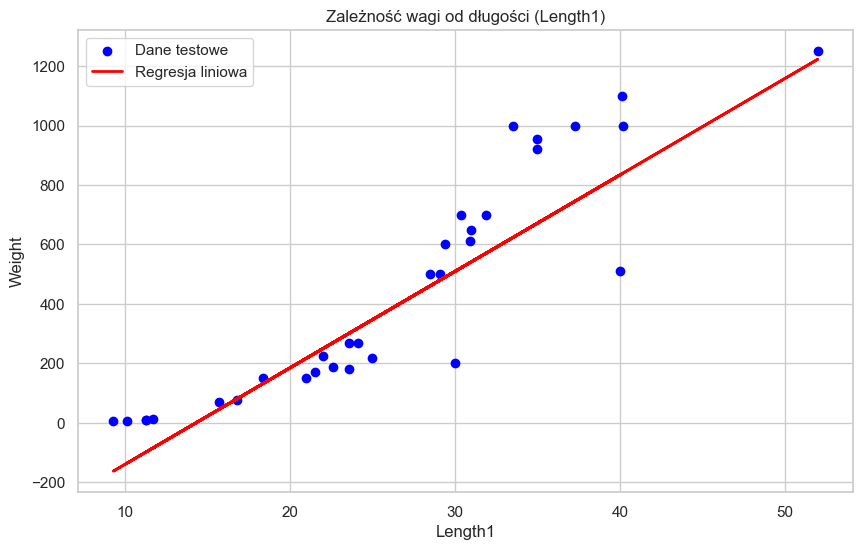


Odpowiedzi:
- Czy zależność ma charakter liniowy? Patrząc na wykres (i fizykę - masa rośnie z sześcianem wymiaru), zależność może być nieliniowa (wykładnicza/wielomianowa). Regresja liniowa jest przybliżeniem.
- Dlaczego regresja jednowymiarowa może być niewystarczająca? Ryba to bryła 3D. Sama długość nie determinuje w pełni masy (ryba może być długa i chuda lub krótka i gruba).
- Dlaczego regresja wieloraka lepiej opisuje to zjawisko? Uwzględnia więcej wymiarów (szerokość, wysokość), co lepiej przybliża objętość, a tym samym masę ryby.


In [9]:
df_fish = pd.read_csv('fish.csv')
print("Dane fish:")
display(df_fish.head())

X_fish1 = df_fish[['Length1']]
y_fish = df_fish['Weight']

X_train_fish1, X_test_fish1, y_train_fish1, y_test_fish1 = train_test_split(X_fish1, y_fish, test_size=0.2, random_state=42)

model_fish1 = LinearRegression()
model_fish1.fit(X_train_fish1, y_train_fish1)
y_pred_fish1 = model_fish1.predict(X_test_fish1)

r2_fish1 = r2_score(y_test_fish1, y_pred_fish1)
rmse_fish1 = np.sqrt(mean_squared_error(y_test_fish1, y_pred_fish1))

print(f"Model 1 (Length1): R^2 = {r2_fish1:.4f}, RMSE = {rmse_fish1:.2f}")

X_fish2 = df_fish[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y_fish = df_fish['Weight']

X_train_fish2, X_test_fish2, y_train_fish2, y_test_fish2 = train_test_split(X_fish2, y_fish, test_size=0.2, random_state=42)

model_fish2 = LinearRegression()
model_fish2.fit(X_train_fish2, y_train_fish2)
y_pred_fish2 = model_fish2.predict(X_test_fish2)

r2_fish2 = r2_score(y_test_fish2, y_pred_fish2)
rmse_fish2 = np.sqrt(mean_squared_error(y_test_fish2, y_pred_fish2))

print(f"Model 2 (Wszystkie wymiary): R^2 = {r2_fish2:.4f}, RMSE = {rmse_fish2:.2f}")

if r2_fish2 > r2_fish1:
    print("Model wieloraki lepiej opisuje dane.")
else:
    print("Model jednowymiarowy lepiej opisuje dane.")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_fish1, y_test_fish1, color='blue', label='Dane testowe')
plt.plot(X_test_fish1, y_pred_fish1, color='red', linewidth=2, label='Regresja liniowa')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Zależność wagi od długości (Length1)')
plt.legend()
plt.show()

print("\nOdpowiedzi:")
print("- Czy zależność ma charakter liniowy? Patrząc na wykres (i fizykę - masa rośnie z sześcianem wymiaru), zależność może być nieliniowa (wykładnicza/wielomianowa). Regresja liniowa jest przybliżeniem.")
print("- Dlaczego regresja jednowymiarowa może być niewystarczająca? Ryba to bryła 3D. Sama długość nie determinuje w pełni masy (ryba może być długa i chuda lub krótka i gruba).")
print("- Dlaczego regresja wieloraka lepiej opisuje to zjawisko? Uwzględnia więcej wymiarów (szerokość, wysokość), co lepiej przybliża objętość, a tym samym masę ryby.")

**Zadanie 5**

Zapoznaj się z zawartością pliku *cars.csv*.

1. Załaduj dane z pliku `cars.csv` do ramki danych.
   Wyświetl podstawowe informacje o danych (`head`, `info`, `describe`).

   
   Następnie:
   - sprawdź brakujące wartości w kolumnach numerycznych i uzupełnij je
     średnią wartością danej kolumny,
   - sprawdź, czy w kolumnie `price` występują wartości ujemne;
     jeśli tak, zastąp je medianą ceny.

3. Przeanalizuj zależności pomiędzy zmiennymi numerycznymi i wybierz jedną cechę,
   która wykazuje wysoką korelację z ceną (`price`). Na tej podstawie zbuduj model
   regresji liniowej i przedstaw go na wykresie razem z danymi.

4. Zbuduj jeszcze dwa modele regresji liniowej dla ceny samochodu, wykorzystując
   inne predyktory. Oblicz współczynnik $R^2$ dla wszystkich trzech modeli.
   Odpowiedz:
   - który predyktor daje najlepszy model,
   - czy jest to ten sam predyktor, który ma najwyższą korelację z ceną?

5. Na tych samych danych zbuduj model regresji wielorakiej, wykorzystując 2 lub 3
   wybrane predyktory. Wypisz współczynniki modelu i zapisz wzór znalezionej funkcji regresji.
   Oblicz również $R^2_{adj}$ dla tego modelu (na podstawie $R^2$, liczby próbek i liczby predyktorów).

6. Zastosuj regresję wielomianową do opisu zależności `citympg` od `horsepower`.
   Porównaj model liniowy i wielomianowy pod względem jakości dopasowania.

7.  Przedstaw model regresji wielorakiej z dwoma predyktorami na wykresie 3D:
   - punkty danych jako wykres punktowy,
   - płaszczyznę reprezentującą znaleziony model regresji.
     Przykłady, jak takie wykresy tworzyć znajdziemy:
*[tutaj](https://matplotlib.org/stable/gallery/mplot3d/index.html)* i *[tutaj](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python#1.-Multiple-linear-regression)*

In [10]:
df_cars = pd.read_csv('cars.csv')
print("Dane cars (przed czyszczeniem):")
display(df_cars.head())
print(df_cars.info())

numeric_cols = df_cars.select_dtypes(include=[np.number]).columns
df_cars[numeric_cols] = df_cars[numeric_cols].fillna(df_cars[numeric_cols].mean())

median_price = df_cars['price'].median()
df_cars.loc[df_cars['price'] < 0, 'price'] = median_price

print("\nDane po czyszczeniu (sprawdzenie braków):")
print(df_cars.isnull().sum())
print(f"Czy są ujemne ceny? {(df_cars['price'] < 0).any()}")

Dane cars (przed czyszczeniem):


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         165 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1


Korelacja z ceną:
price               1.000000
enginesize          0.871885
curbweight          0.834563
horsepower          0.807098
carwidth            0.760695
carlength           0.685048
boreratio           0.549564
wheelbase           0.531855
carheight           0.124211
stroke              0.091480
compressionratio    0.074630
symboling          -0.077784
peakrpm            -0.082862
car_ID             -0.103925
citympg            -0.681528
highwaympg         -0.692559
Name: price, dtype: float64

Najlepsza cecha (najwyższa korelacja): enginesize
Model 1 (enginesize): R^2 = 0.7602


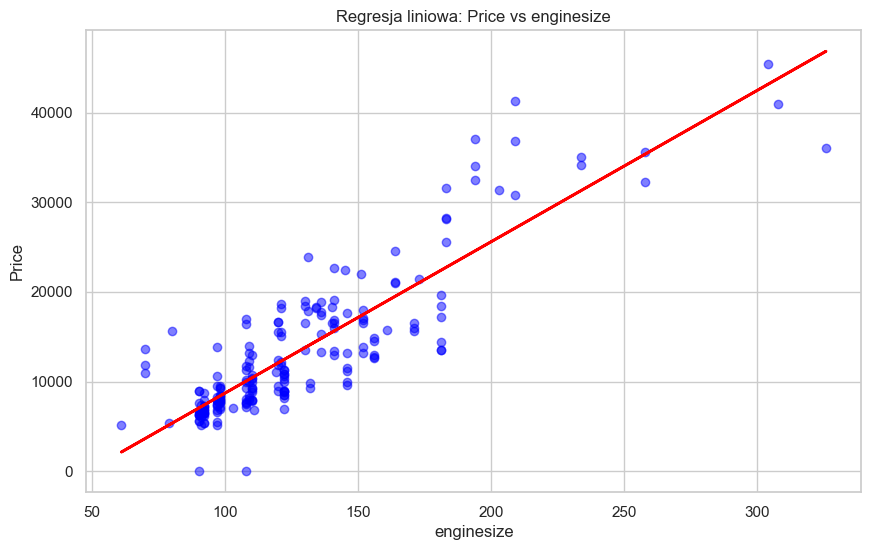

In [11]:
corr_matrix = df_cars[numeric_cols].corr()
price_corr = corr_matrix['price'].sort_values(ascending=False)
print("\nKorelacja z ceną:")
print(price_corr)

best_feature = price_corr.index[1]
print(f"\nNajlepsza cecha (najwyższa korelacja): {best_feature}")

X_cars1 = df_cars[[best_feature]]
y_cars = df_cars['price']

model_cars1 = LinearRegression()
model_cars1.fit(X_cars1, y_cars)
r2_cars1 = model_cars1.score(X_cars1, y_cars)

print(f"Model 1 ({best_feature}): R^2 = {r2_cars1:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_cars1, y_cars, color='blue', alpha=0.5)
plt.plot(X_cars1, model_cars1.predict(X_cars1), color='red', linewidth=2)
plt.xlabel(best_feature)
plt.ylabel('Price')
plt.title(f'Regresja liniowa: Price vs {best_feature}')
plt.show()

In [12]:
feature_2 = price_corr.index[2]
feature_3 = price_corr.index[3]

print(f"Kolejne cechy: {feature_2}, {feature_3}")

X_cars2 = df_cars[[feature_2]]
model_cars2 = LinearRegression()
model_cars2.fit(X_cars2, y_cars)
r2_cars2 = model_cars2.score(X_cars2, y_cars)

X_cars3 = df_cars[[feature_3]]
model_cars3 = LinearRegression()
model_cars3.fit(X_cars3, y_cars)
r2_cars3 = model_cars3.score(X_cars3, y_cars)

print(f"Model 2 ({feature_2}): R^2 = {r2_cars2:.4f}")
print(f"Model 3 ({feature_3}): R^2 = {r2_cars3:.4f}")

best_r2 = max(r2_cars1, r2_cars2, r2_cars3)
if best_r2 == r2_cars1:
    print(f"Najlepszy predyktor: {best_feature}")
elif best_r2 == r2_cars2:
    print(f"Najlepszy predyktor: {feature_2}")
else:
    print(f"Najlepszy predyktor: {feature_3}")

print(f"Czy to ten sam co ma najwyższą korelację? {'Tak' if best_r2 == r2_cars1 else 'Nie'}")

Kolejne cechy: curbweight, horsepower
Model 2 (curbweight): R^2 = 0.6965
Model 3 (horsepower): R^2 = 0.6514
Najlepszy predyktor: enginesize
Czy to ten sam co ma najwyższą korelację? Tak


In [13]:
features_multi = [best_feature, feature_2, feature_3]
X_cars_multi = df_cars[features_multi]

model_cars_multi = LinearRegression()
model_cars_multi.fit(X_cars_multi, y_cars)
r2_multi = model_cars_multi.score(X_cars_multi, y_cars)

n = len(y_cars)
p = len(features_multi)
adj_r2 = 1 - (1 - r2_multi) * (n - 1) / (n - p - 1)

print(f"Model wieloraki ({features_multi}):")
print(f"R^2 = {r2_multi:.4f}")
print(f"Adjusted R^2 = {adj_r2:.4f}")

print("\nWspółczynniki:")
for f, c in zip(features_multi, model_cars_multi.coef_):
    print(f"{f}: {c:.4f}")
print(f"Intercept: {model_cars_multi.intercept_:.4f}")

print("\nWzór:")
equation = f"Price = {model_cars_multi.intercept_:.2f}"
for f, c in zip(features_multi, model_cars_multi.coef_):
    equation += f" + ({c:.2f} * {f})"
print(equation)

Model wieloraki (['enginesize', 'curbweight', 'horsepower']):
R^2 = 0.8109
Adjusted R^2 = 0.8081

Współczynniki:
enginesize: 84.2420
curbweight: 4.3579
horsepower: 49.4687
Intercept: -13716.3132

Wzór:
Price = -13716.31 + (84.24 * enginesize) + (4.36 * curbweight) + (49.47 * horsepower)



Citympg vs Horsepower:
Liniowy R^2: 0.6423
Wielomianowy R^2: 0.7767


c:\Users\kacpe\Desktop\laby\Inzynieria i analiza danych\lab8\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kacpe\Desktop\laby\Inzynieria i analiza danych\lab8\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


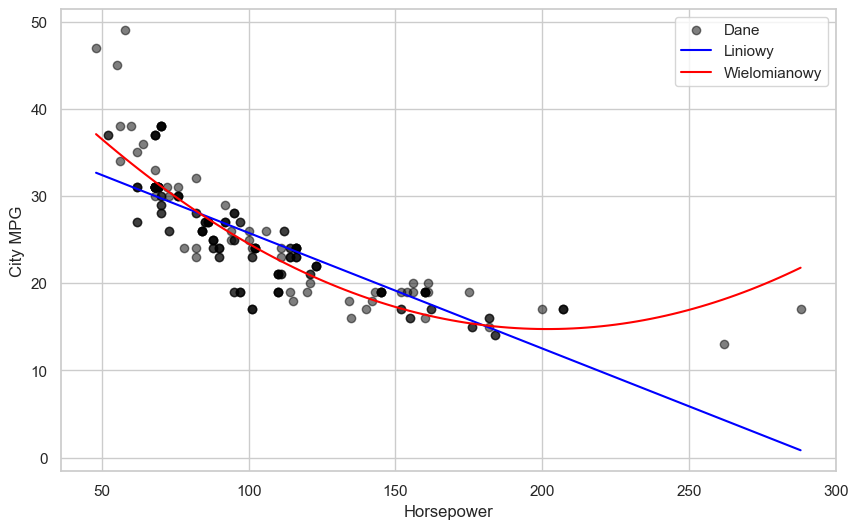

In [14]:
if 'horsepower' in df_cars.columns and 'citympg' in df_cars.columns:
    X_hp = df_cars[['horsepower']]
    y_mpg = df_cars['citympg']

    model_lin_hp = LinearRegression()
    model_lin_hp.fit(X_hp, y_mpg)
    r2_lin_hp = model_lin_hp.score(X_hp, y_mpg)

    poly_hp = PolynomialFeatures(degree=2)
    X_poly_hp = poly_hp.fit_transform(X_hp)
    
    model_poly_hp = LinearRegression()
    model_poly_hp.fit(X_poly_hp, y_mpg)
    r2_poly_hp = model_poly_hp.score(X_poly_hp, y_mpg)

    print(f"\nCitympg vs Horsepower:")
    print(f"Liniowy R^2: {r2_lin_hp:.4f}")
    print(f"Wielomianowy R^2: {r2_poly_hp:.4f}")

    # Wykres
    plt.figure(figsize=(10, 6))
    plt.scatter(X_hp, y_mpg, color='black', alpha=0.5, label='Dane')
    
    X_range_hp = np.linspace(X_hp.min(), X_hp.max(), 100).reshape(-1, 1)
    plt.plot(X_range_hp, model_lin_hp.predict(X_range_hp), color='blue', label='Liniowy')
    plt.plot(X_range_hp, model_poly_hp.predict(poly_hp.transform(X_range_hp)), color='red', label='Wielomianowy')
    
    plt.xlabel('Horsepower')
    plt.ylabel('City MPG')
    plt.legend()
    plt.show()
else:
    print("Brak kolumn 'horsepower' lub 'citympg' w danych.")

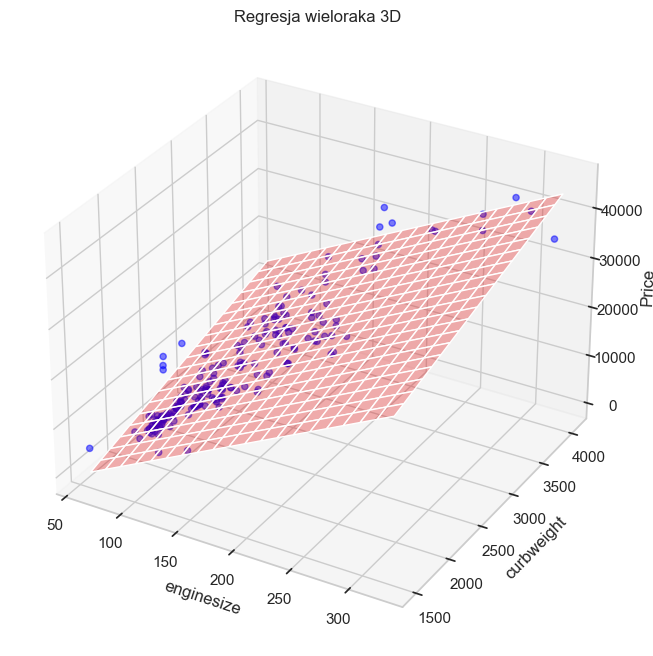

In [15]:
#Wykres 3D
from mpl_toolkits.mplot3d import Axes3D

feat1 = features_multi[0]
feat2 = features_multi[1]

X_3d = df_cars[[feat1, feat2]]
y_3d = df_cars['price']

model_3d = LinearRegression()
model_3d.fit(X_3d, y_3d)

x_surf, y_surf = np.meshgrid(np.linspace(X_3d[feat1].min(), X_3d[feat1].max(), 20),
                             np.linspace(X_3d[feat2].min(), X_3d[feat2].max(), 20))
onlyX = pd.DataFrame({feat1: x_surf.ravel(), feat2: y_surf.ravel()})
fittedY = model_3d.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[feat1], X_3d[feat2], y_3d, c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)

ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_zlabel('Price')
ax.set_title('Regresja wieloraka 3D')
plt.show()